# Project 2

##### Team member: Zhihong Zhang.

## Part 1: Introduction ##

The dataset of this project is based on the salaries package provided in the R programming language Package. 

#### The setting up of the project

In [1]:
#starting point:import the library and data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

salaries ='https://raw.githubusercontent.com/steinszzh/DAV-5400/master/project2/Salaries.csv'
salary = pd.read_csv(salaries,index_col=0)
# data set check - make sure data was read in as expected
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


As the data base mentioned, the data set contains the 2008-2009 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members.
After checking the data, it is clear to see some potential correlation between salaries and some other attributes. I would like to explore the difference on salaries between the genders. 

#### research question

To better serve the goal of exploring the data set on gender difference, one foundamental question is seeked to ask : 
- Is the pay fair for both genders?  

According to this goal of comparision on performance, the research questions are created and I decide to see the salary difference based on area of study, years of service,rank and gender.

## Part 2: Data Summary

The dataset was acquired from the R data set repository[https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv]. The  dataset contains 397 rows and 6 attributes. These attributes are:




- rank: a factor with levels (values are AssocProf, AsstProf,and Prof).It is categorical/ordinal.

- discipline: a factor with levels A (“theoretical” departments) or B (“applied” departments). It is categorical/regular.

- yrs.since.phd: years since PhD. It is numerical/continuous.

- yrs.service: years of service. It is numerical/continuous. 

- Sex: a factor with levels Female and Male. It is categorical/regular. 

- salary : nine-month salary, in dollars. It is numerical/continuous.


## Part 3: Exploratory Data Analysis (EDA) 

To explore the data, I firstly need to make sure how dimensions are distributed in the data set. Due to the possibility that data set is not evenly distributed into two genders (which means that one gender will have more people) To make comparision, this situation of sample size needs to be taken into account. To get start, I use the describe function to know the quantative stats for the numerical variables.

In [2]:
#create a copy for first section to make sure not messing up data
salary1 = salary.copy()

#displays descriptive stats for all numeric variables
salary1.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


There are 397 rows among these data set. And it showed descriptive stats for all numeric variables. mean of yrs since phd is 22.314861 and mean of years service is 17.614610. They are both greater than median value of 21 and 16. It means that both two values are skewed to the right. Similarly, the salary is also skewed to the right.


Firstly, for the rank attribute, I choose bar chart to explore this attribute. 

#### Attribute: rank

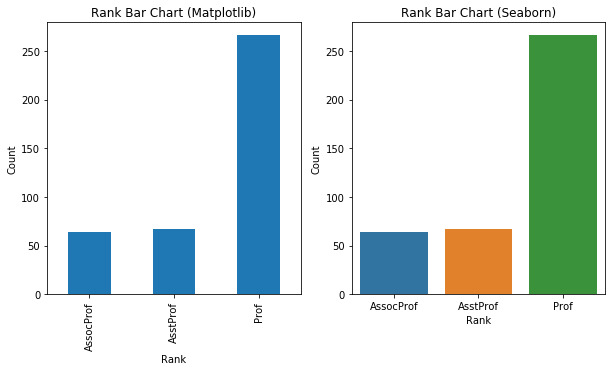

In [21]:
# side-by-side barplot Matplotlib and Seaborn for rank based on the number of the distribution.
# define a new figure for plotting
plt.figure(figsize=(10,5))

# define the left plot which is created by matplotlib
plt.subplot(121)

# matplotlib graph of Sex

rank_count = salary1.groupby('rank').count()['salary']
rank_count.plot.bar();

# give the plot a title
plt.title('Rank Bar Chart (Matplotlib)')
plt.xlabel('Rank')
plt.ylabel('Count')

#Then using seaborn to create graph

# define the right graph
plt.subplot(122)

# Seaborn graph of rank
sns.countplot(x='rank',data=salary1, order=['AssocProf','AsstProf','Prof'])

# give the plot a title
plt.title('Rank Bar Chart (Seaborn)')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

Based on the graph, we know that in this data set, majority is professor rank and there is more assistant prof than asscociated prof but they are basically the same level.

Then I choose bar plot for discipline attributes. 

#### Attribute: discipline

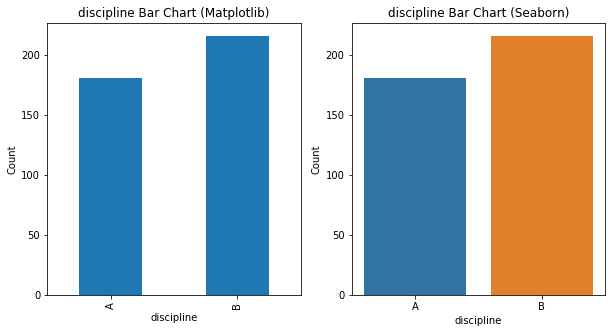

In [22]:
# plot barplot by using Matplotlib and Seaborn for discipline based on the number of the distribution.
# make the appropriate size of figure
plt.figure(figsize=(10,5))

# make matplotlib plot on the left
plt.subplot(121)

# matplotlib graph of Sex
discipline_count = salary1.groupby('discipline').count()['salary']
discipline_count.plot.bar();

# give the plot a title
plt.title('discipline Bar Chart (Matplotlib)')
plt.xlabel('discipline')
plt.ylabel('Count')

#Then using seaborn to create graph

# create the right side graph 
plt.subplot(122)

# make Seaborn graph of discpline
sns.countplot(x='discipline',data=salary1, order=['A','B'])

# give the plot a title
plt.title('discipline Bar Chart (Seaborn)')
plt.xlabel('discipline')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'salary')

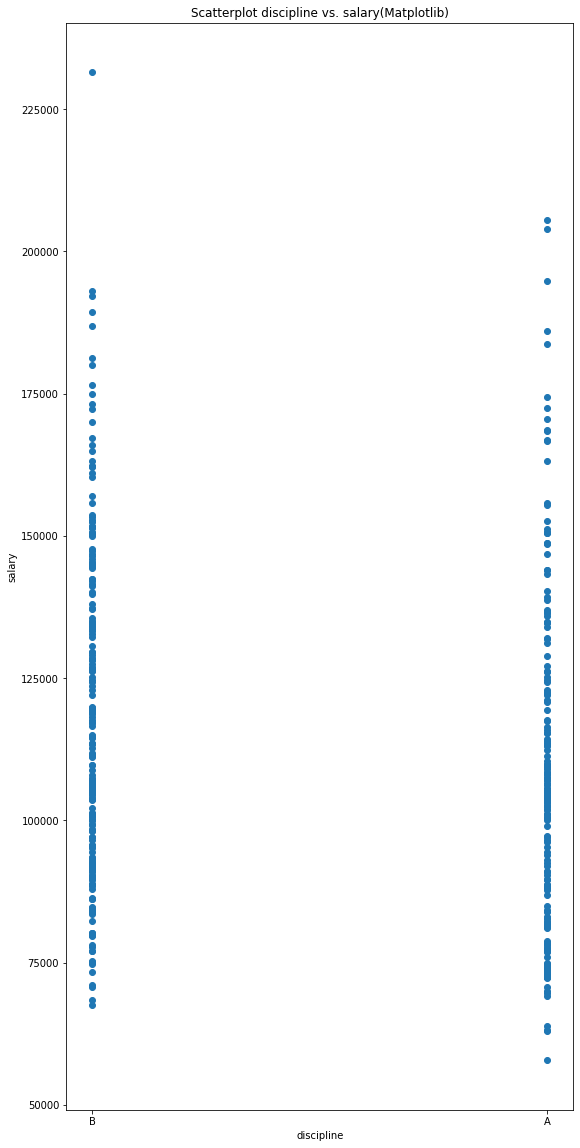

In [23]:
#drawing scatterplots by Matplotlib and Seaborn
#plot matploblib on the left
plt.figure(figsize=(20,20))

#plots discipline vs salary using matplotlib
plt.subplot(121)
plt.scatter(x='discipline', y='salary', data=salary1)
plt.title('Scatterplot discipline vs. salary(Matplotlib)')
plt.xlabel('discipline')
plt.ylabel('salary')


By checking the spread of discipline vs salary, we can tell that in general, applied field has a smaller standard deviation (narrow spread). Also two bar charts showed that applied and theoritical has the similar level of quantity but there is more samples in applied disciplines.

For years since phd attribute, box plot was made.

#### Attribute: yrs.since.phd

Text(0.5, 1.0, 'years since phd Boxplot (Seaborn)')

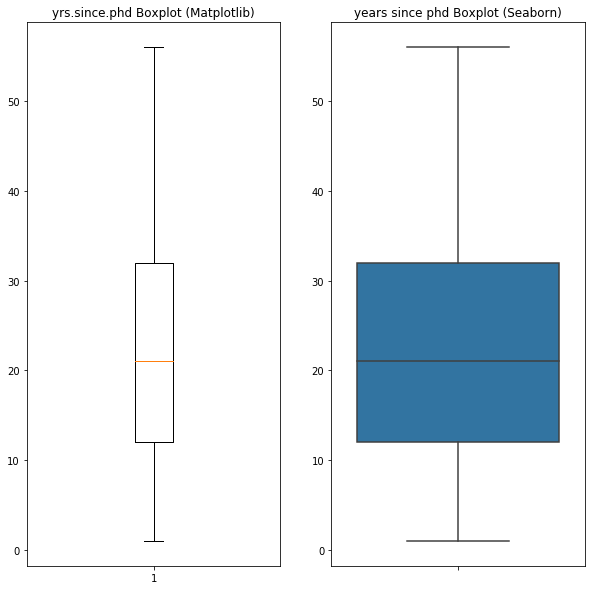

In [6]:
# make boxplot for years since phd by two method
salary_yrs_phd = salary1['yrs.since.phd']

# define a new figure for plotting
plt.figure(figsize=(10,10))

# define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

# Matplotlib boxplot for years since phd
plt.boxplot(x=salary_yrs_phd)

# give the plot a title
plt.title('yrs.since.phd Boxplot (Matplotlib)')



#make right side plot

plt.subplot(122)

# create Seaborn boxplot for years since phd
sns.boxplot(tuple(salary_yrs_phd),orient='v')

# give the plot a title
plt.title('years since phd Boxplot (Seaborn)')

Based on the graph, we know that the median of years since phd is around 22, up bound and low bound is roughly 33 and 14.

Scatterplot was used to demonstrate the years of service attributes.

#### Attribute: yrs.service

Text(0, 0.5, 'salary')

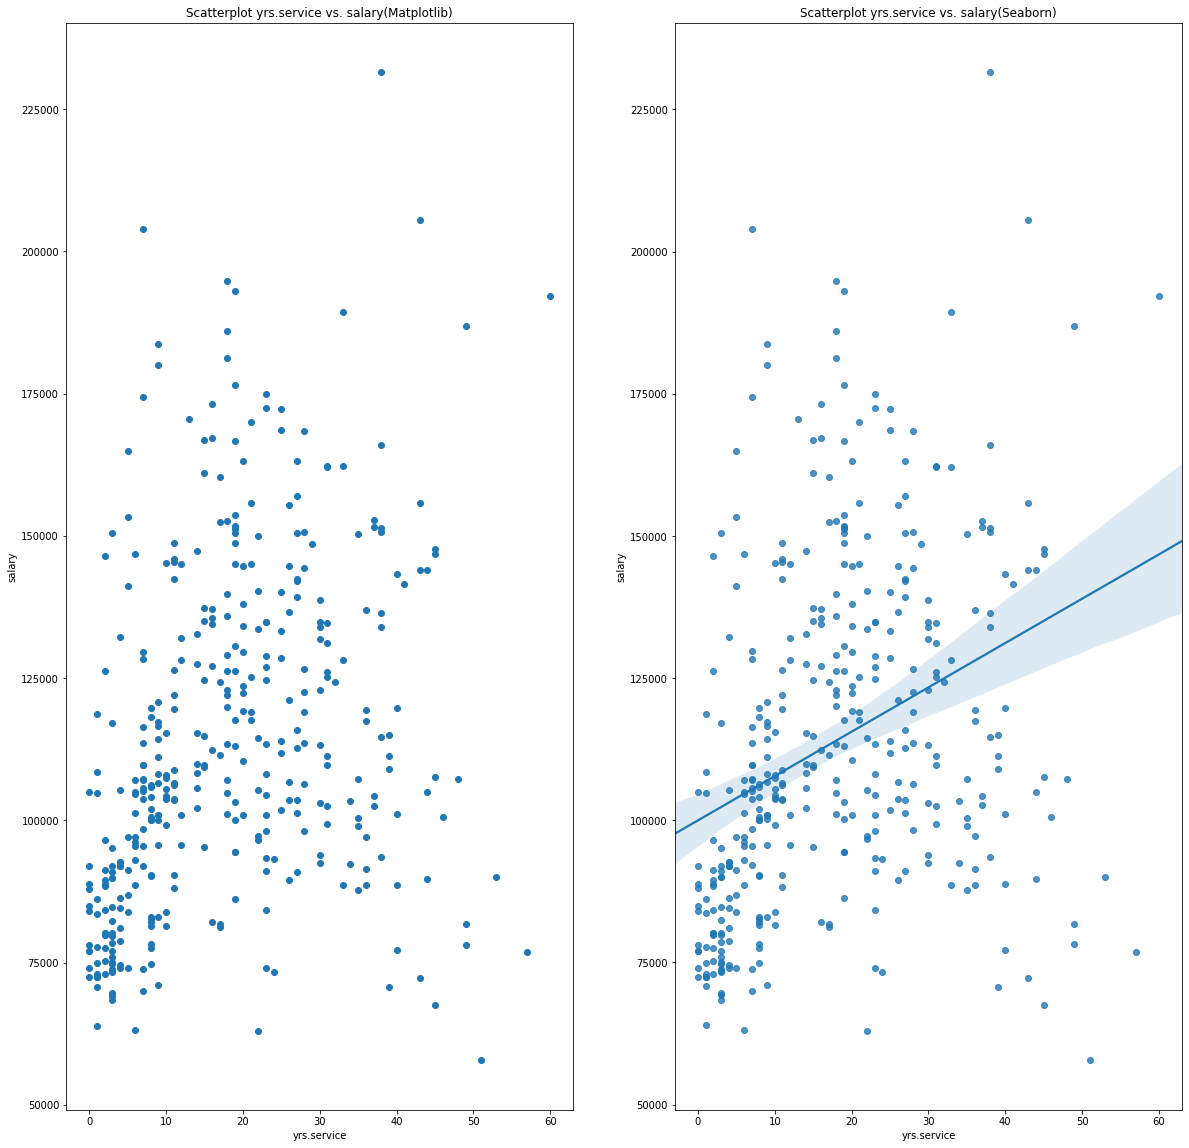

In [24]:
#drawing scatterplots by Matplotlib and Seaborn
#plot matploblib on the left
plt.figure(figsize=(20,20))

#plots years service vs salary using matplotlib
plt.subplot(121)
plt.scatter(x='yrs.service', y='salary', data=salary1)
plt.title('Scatterplot yrs.service vs. salary(Matplotlib)')
plt.xlabel('yrs.service')
plt.ylabel('salary')

#plots years service vs salary using seaborn
plt.subplot(122)
sns.regplot(x='yrs.service', y='salary', data=salary1)
plt.title('Scatterplot yrs.service vs. salary(Seaborn)')
plt.xlabel('yrs.service')
plt.ylabel('salary')



As the result showed, in general, the years of service is positively correlated to the salary. The correlation does not show a direct linear regression and it can be contributed to the fact that other factors such as rank or discipline impacts the salary

For the sex attribue, bar chart was used to check the frequency of the distribution.

#### Attribute: Sex

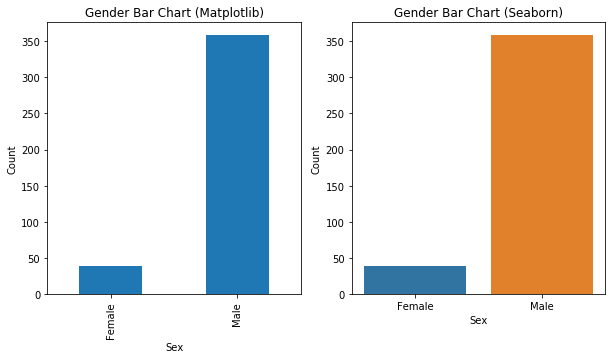

In [8]:
# side-by-side barplot Matplotlib and Seaborn for Sex based on the number of the distribution.
# define a new figure for plotting
plt.figure(figsize=(10,5))

# define the left plot which is created by matplotlib
plt.subplot(121)

# matplotlib graph of Sex
gender_count = salary1.groupby('sex').count()['salary']
gender_count.plot.bar();

# give the plot a title
plt.title('Gender Bar Chart (Matplotlib)')
plt.xlabel('Sex')
plt.ylabel('Count')

#Then using seaborn to create graph

# define the right graph
plt.subplot(122)

# Seaborn graph of Sex
sns.countplot(x='sex',data=salary1, order=['Female','Male'])

# give the plot a title
plt.title('Gender Bar Chart (Seaborn)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Based on this bar chart, we know that the majority of the data set is male. And it has more than 1:8 gender ratio between male and female. 

#### Attribute: Salary

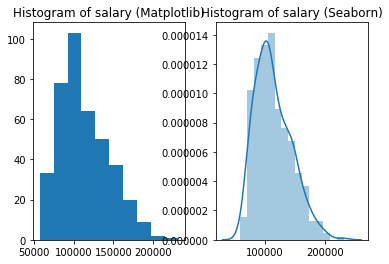

In [9]:
# plot histogram by using Matplotlib and Seaborn
salary_hist = salary1['salary']

#plot matplotlib graph on the left
plt.subplot(121)

#Matlplotlib histogram for salary
plt.hist(tuple(salary_hist))
plt.title('Histogram of salary (Matplotlib)')

#plot seaborn on the right side
plt.subplot(122)

#Seaborn histogram for length
sns.distplot(tuple(salary_hist))

plt.title('Histogram of salary (Seaborn)')
plt.show()

Based on the histogram of salary, it is clear that majority of the salary level is between 80,000 to 11,000 for professor. 

## Part 4: Inference 

Based on the EDA section, I have better understanding of the patterns of each attributes. Firstly, I decide to make a new dataframe.

In [10]:
#create a copy for salary to make sure not messing up data
salary2 = salary.copy()


To test whether there is a salary ineuality, I test the data of salary abover the average. Since there is more than half of data below the mean , it means that the data has more high salary outliers to drag mean to the right.

In [11]:
# Calculate the salary mean
salary_mean = salary2.salary.mean()
salary_mean
# Create a column "special_salary" that contains all of salary values less than the salary mean
special_salary = salary2.salary[salary2.salary<salary_mean]
special_salary.count()

229

In [12]:
special_salary.describe()

count       229.000000
mean      92451.519651
std       13247.199984
min       57800.000000
25%       81500.000000
50%       93000.000000
75%      104121.000000
max      113600.000000
Name: salary, dtype: float64

After getting the data, I then created box charts of salary based on gender. For this general plot, I firstly includes all attributesto see the patterns of salary plot.

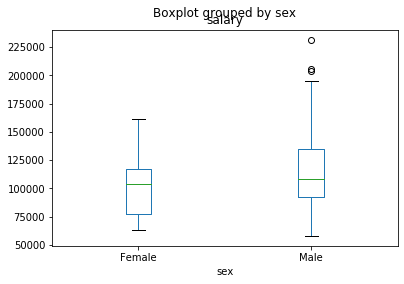

In [13]:
#print boxplot by using matplotlib
salary2.boxplot(by ='sex', column =['salary'], grid = False) 

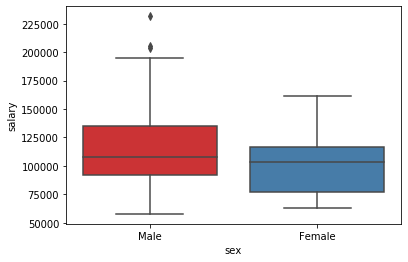

In [14]:
# print boxplot by using seaborns
sns.boxplot(x="sex", y="salary", data=salary2, palette="Set1")
#sns.plt.show()

Through these two bar charts, it is easy to tell that for both two genders, the mean is about the same. Compared with the male faculty, the female has a narrow spread. Also the minimum salary level for the female is higher than the male. Due to the fact that the male has some outlier drags the average to higher value. Since there are other factors impacting on the average(such as the rank or years of service), other steps need to be used.

To further explore the data, I decide to make the controlled group. Based on that the rank of professor occupies the majority of the samples, I decided to compare salary when both genders have the same rank in the applied field.

In [15]:
#create subset of rank, sex,discipline and salary
salary_select = salary2.loc[:,['rank','discipline','sex','salary']]
#filter data to be prof in applied field only
salary_select_prof = salary_select[(salary_select['rank']=='Prof')& (salary_select['discipline']=='B')]

#get most frequent salary
print(salary_select_prof.describe())

              salary
count     135.000000
mean   133393.755556
std     25909.826711
min     67559.000000
25%    114548.000000
50%    132261.000000
75%    150188.000000
max    231545.000000


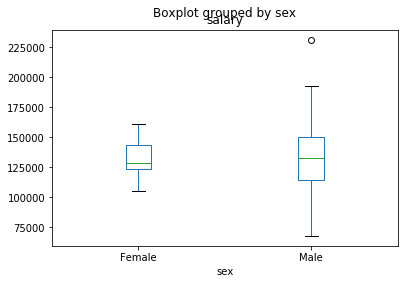

In [16]:
#print boxplot by using matplotlib
salary_select_boxplot=salary_select_prof.boxplot(by ='sex', column =['salary'], grid = False) 

salary_select_boxplot;

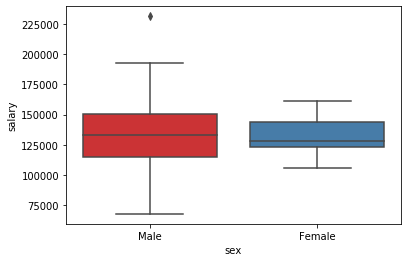

In [17]:
# print boxplot by using seaborns
sns.boxplot(x="sex", y="salary", data=salary_select_prof, palette="Set1")
#sns.plt.show()

After this controlled group we can tell that female has a even narrowed spread. To dig further, I tried to import another variable, employer who worked for more than 18 years and in applied field. Similarily,I make plot as well. 

In [18]:
#create subset of rank, sex,discipline and salary
salary_select_yrs = salary2.loc[:,['rank','discipline','yrs.service','sex','salary']]
#filter data to be prof in applied field work for more than 18 years
salary_select_yrs = salary_select_yrs[(salary_select_yrs['rank']=='Prof')& (salary_select_yrs['discipline']=='B')&(salary_select_yrs['yrs.service']>=18)]

#get most frequent salary
print(salary_select_prof.describe())

              salary
count     135.000000
mean   133393.755556
std     25909.826711
min     67559.000000
25%    114548.000000
50%    132261.000000
75%    150188.000000
max    231545.000000


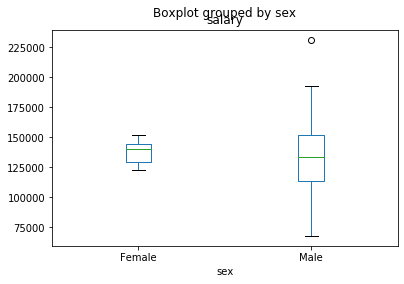

In [19]:
#print boxplot by using matplotlib
salary_select_boxplot=salary_select_yrs.boxplot(by ='sex', column =['salary'], grid = False) 

salary_select_boxplot;

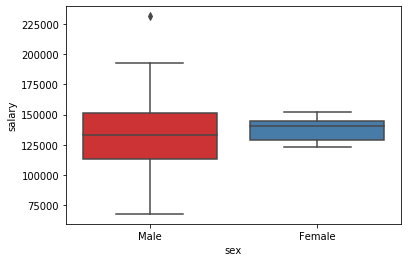

In [20]:
# print boxplot by using seaborns as well
sns.boxplot(x="sex", y="salary", data=salary_select_yrs, palette="Set1")
#sns.plt.show()

After this controlled group in the apllied field, the female controlled group has a narrower spread. Interestingly, now the female faculty has a higher average salary value than the male. 

##### Result:

Based on these printed graph on different control groups, although it has a very similar shape and spread, that as we filtered more , the size of spread on female professor becomes smaller. The main reason of this phenomenon is that there is not enough samples for the selected group(female) the filter dramistically changed the possible output.

## Part 5: Conclusion 

By answering the research question and explore various type of data, in my opinion,the research question provides the part of view how the the salary level differ from each individuals within a college. 
Based on the information we have, we could not say that there is any direct evidence that the female employee did not get a fair pay or not. Contributing to the limited sample size of the data(Especially there is a relatively small group of female professors), the samples does not spread a lot, and it does not provide enough data for making the right judgement on salary inquality. 

Also, with some research of this question, the reference does mention the salary inquality near 2006, while it cannot help to explain this data by this college since this data set may be one of the special cases in the educational system.

Therefore, Compared the huge difference between the size of samples between two genders, we still lacked the envidence to confidently say that there is a significant difference between male and female on salary in this college. 

## References ##
1. https://www.insidehighered.com/news/2018/04/11/aaups-annual-report-faculty-compensation-takes-salary-compression-and-more

2. https://ed.psu.edu/cshe/working-papers/wp-11
